In [14]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta
from sklearn.metrics import root_mean_squared_error
import pickle
from prepare_data import PrepareData
from pmdarima.arima import auto_arima


Get Data

In [15]:
df = PrepareData.df
train_data = PrepareData.train_data()
test_data = PrepareData.test_data()

In [16]:
# TODO: change this if necessary
attr = "api_temp"

# Training sarima to predict the temperature 

## EDA

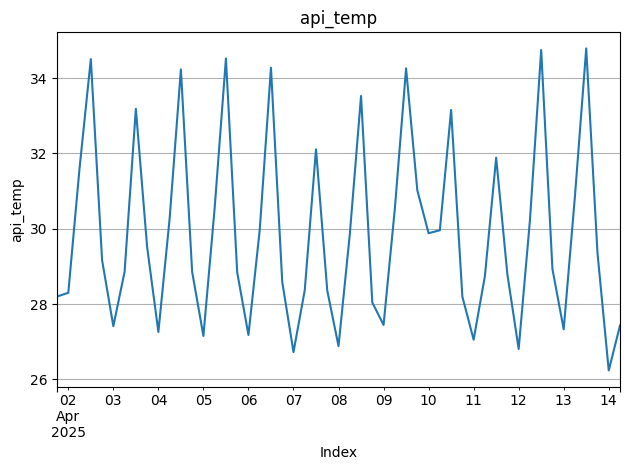

In [17]:
plt.figure()  # Create a new figure for each plot
df["api_temp"].plot()
plt.title("api_temp")
plt.xlabel("Index")  # or "Date" if it's time series
plt.ylabel("api_temp")
plt.grid(True)
plt.tight_layout()
plt.show()

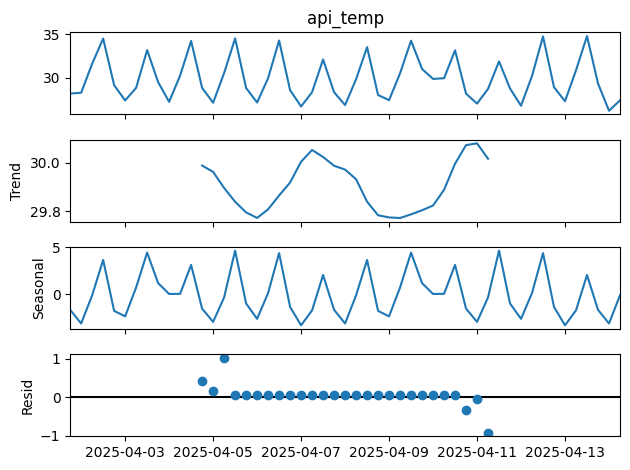

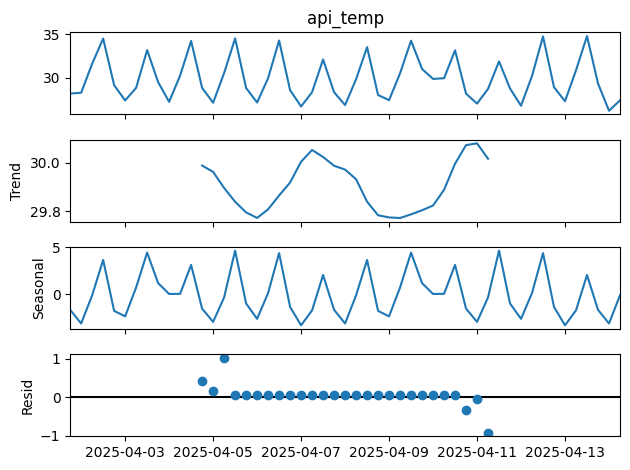

In [18]:
seasonal_decompose(df[attr].interpolate(), model="additive").plot()

In [19]:
diffed_data = df[attr].dropna()
diff = 0
while True:
    result = adfuller(diffed_data)
    if result[1] < 0.05 or result[0] < result[4]["5%"]:
        print(f"d={diff}")
        print("ADF Statistic:", result[0])
        print("p-value:", result[1])
        for key, value in result[4].items():
            print("Critial Values:")
            print(f"   {key}, {value}")
        break
    diffed_data = diffed_data.diff().dropna()
    diff += 1

d=0
ADF Statistic: -3.9353736032188276
p-value: 0.0017894024558540327
Critial Values:
   1%, -3.596635636000432
Critial Values:
   5%, -2.933297331821618
Critial Values:
   10%, -2.6049909750566895


Use d=0.

### Find the P parameter

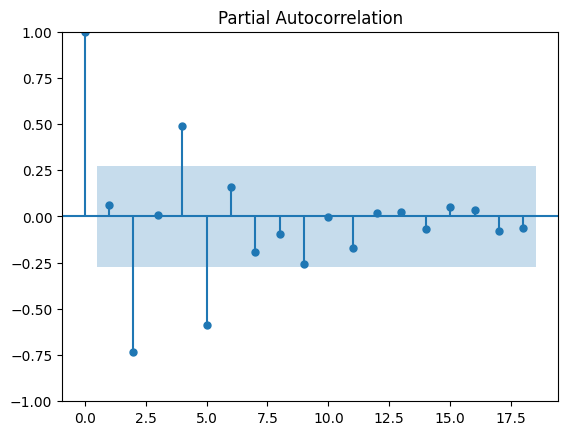

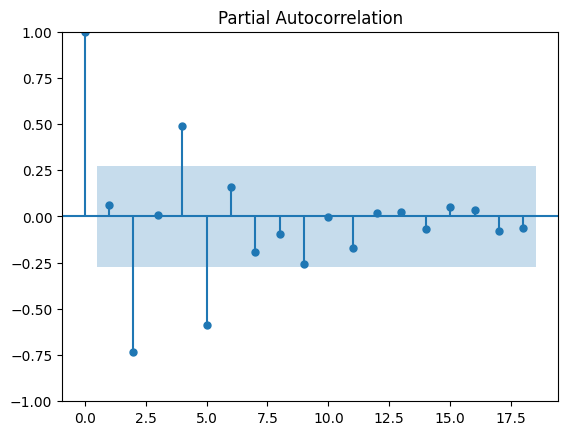

In [20]:
plot_pacf(diffed_data)

Use p = 4

### Find the Q parameter

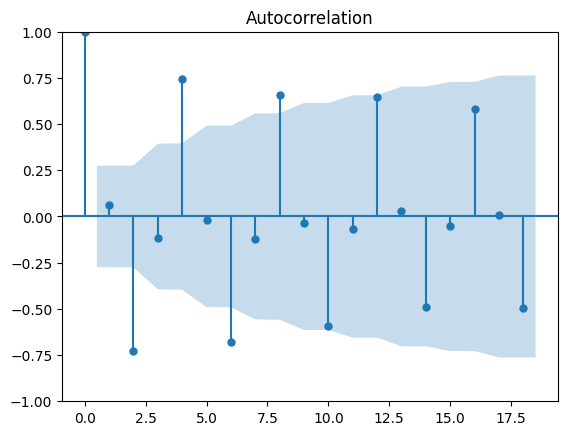

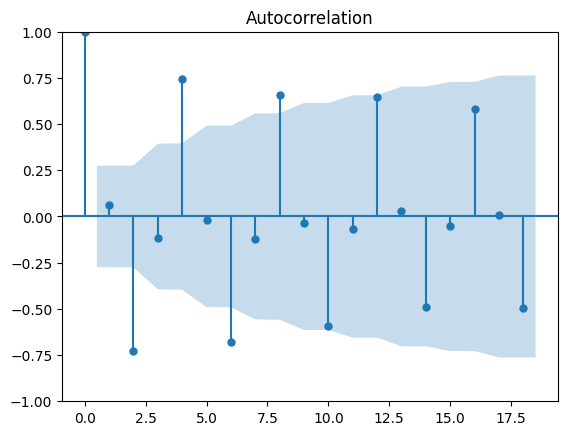

In [21]:
plot_acf(diffed_data)

Use q = 5

## Pre-Processing

The missing value is already filled using KNN Imputer

## Train the model

In [22]:
# Use auto_arima to find the best model parameters
# idk wtf each parameters does, go fix yourself.
# TODO: change parameters
model = auto_arima(
    train_data[attr],
    seasonal=True,
    m=3,  # Seasonality every day
    d=0,  #
    D=0,
    max_p=5,
    max_q=5,
    max_P=5,
    max_Q=5,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=139.135, Time=0.02 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=142.917, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=281.521, Time=0.01 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[3] intercept   : AIC=140.919, Time=0.39 sec
 ARIMA(0,0,0)(0,0,1)[3] intercept   : AIC=inf, Time=0.15 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[3] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[3] intercept   : AIC=141.131, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[3] intercept   : AIC=140.039, Time=0.03 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[3] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[3] intercept
Total fit time: 2.374 seconds


However, auto_arima gives us p=0 and q=0, contradicting with our findings. We tried using p=4 and q=5 to verify but the model throws error at us.

In [23]:
model_attr = SARIMAX(
    endog=train_data[attr], order=(0,0,0), seasonal_order=(4, 0, 1, 3)
)
attr_results = model_attr.fit()

steps = len(test_data)

attr_prediction = attr_results.get_forecast(steps=steps).predicted_mean
forecast_index = pd.date_range(
    start=test_data.index[0],
    freq=timedelta(days=1),
    periods=int(test_data[attr].count()),
)
attr_prediction.index = test_data.index[:steps]
attr_prediction.columns = ["predicted"]

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:                        SARIMAX   Log Likelihood                 -67.567
Date:                Wed, 30 Apr 2025   AIC                            139.135
Time:                        11:50:02   BIC                            141.869
Sample:                    04-01-2025   HQIC                           139.991
                         - 04-08-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.8725      0.606     49.314      0.000      28.685      31.060
sigma2         6.1838      2.786      2.220      0.026       0.724      11.643
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.20
Prob(Q):                              0.95   Prob(JB):                         0.20
Heteroskedasticity (H):               1.20   Skew:                             0.70
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

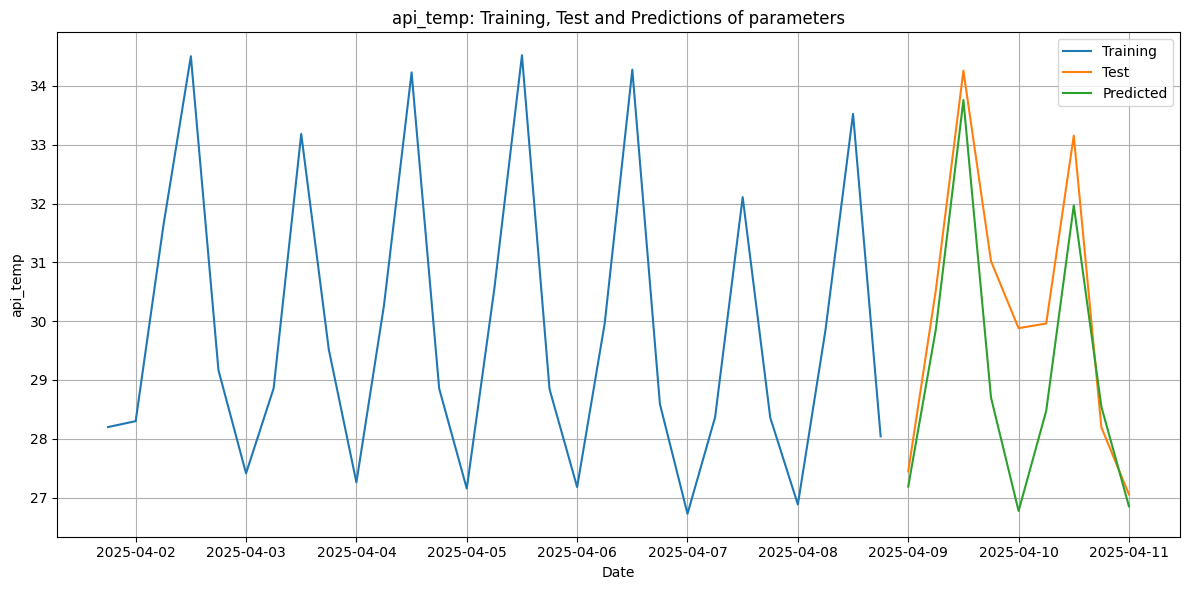

RMSE is :  1.4749237230323706


In [25]:
plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data[attr], label="Training")
plt.plot(test_data.index, test_data[attr], label="Test")
plt.plot(test_data.index, attr_prediction, label="Predicted")

plt.legend()
plt.xlabel("Date")
plt.ylabel(attr)
plt.title(f"{attr}: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print("RMSE is : ", root_mean_squared_error(test_data[attr], attr_prediction))

## Save the model using pickle

In [26]:
# TODO: change file name
with open(f"../exports/{attr}_sarima.pkl", "wb") as file:
    pickle.dump(attr_results, file)